In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/slooze-challenge/slooze_challenge/InvoicePurchases12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/EndInvFINAL12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/SalesFINAL12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/BegInvFINAL12312016.csv
/kaggle/input/slooze-challenge/slooze_challenge/2017PurchasePricesDec.csv
/kaggle/input/slooze-challenge/slooze_challenge/PurchasesFINAL12312016.csv


In [2]:
#invoice file path 
invoice_file_path = "/kaggle/input/slooze-challenge/slooze_challenge/InvoicePurchases12312016.csv"
endinv_file_path="/kaggle/input/slooze-challenge/slooze_challenge/EndInvFINAL12312016.csv"
sales_file_path="/kaggle/input/slooze-challenge/slooze_challenge/SalesFINAL12312016.csv"
beginv_file_path="/kaggle/input/slooze-challenge/slooze_challenge/BegInvFINAL12312016.csv"
pur_price_file_path="/kaggle/input/slooze-challenge/slooze_challenge/2017PurchasePricesDec.csv"
pur_final_file_path="/kaggle/input/slooze-challenge/slooze_challenge/PurchasesFINAL12312016.csv"


invoice information 

In [3]:
df_invoicepurchase = pd.read_csv(invoice_file_path)
df_invoicepurchase.head(5)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


end of inventory details

In [4]:
df_endinv = pd.read_csv(endinv_file_path)
df_endinv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


sales information

In [5]:
df_sales = pd.read_csv(sales_file_path)
df_sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


begin of inventory

In [6]:
df_beginv=pd.read_csv(beginv_file_path)
df_beginv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


purchase price 

In [7]:
df_pur_price = pd.read_csv(pur_price_file_path)
df_pur_price.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


purchases final 

In [8]:
df_pur_final = pd.read_csv(pur_final_file_path)
df_pur_final.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


Demand Forecasting

In [9]:
#once again importing the packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

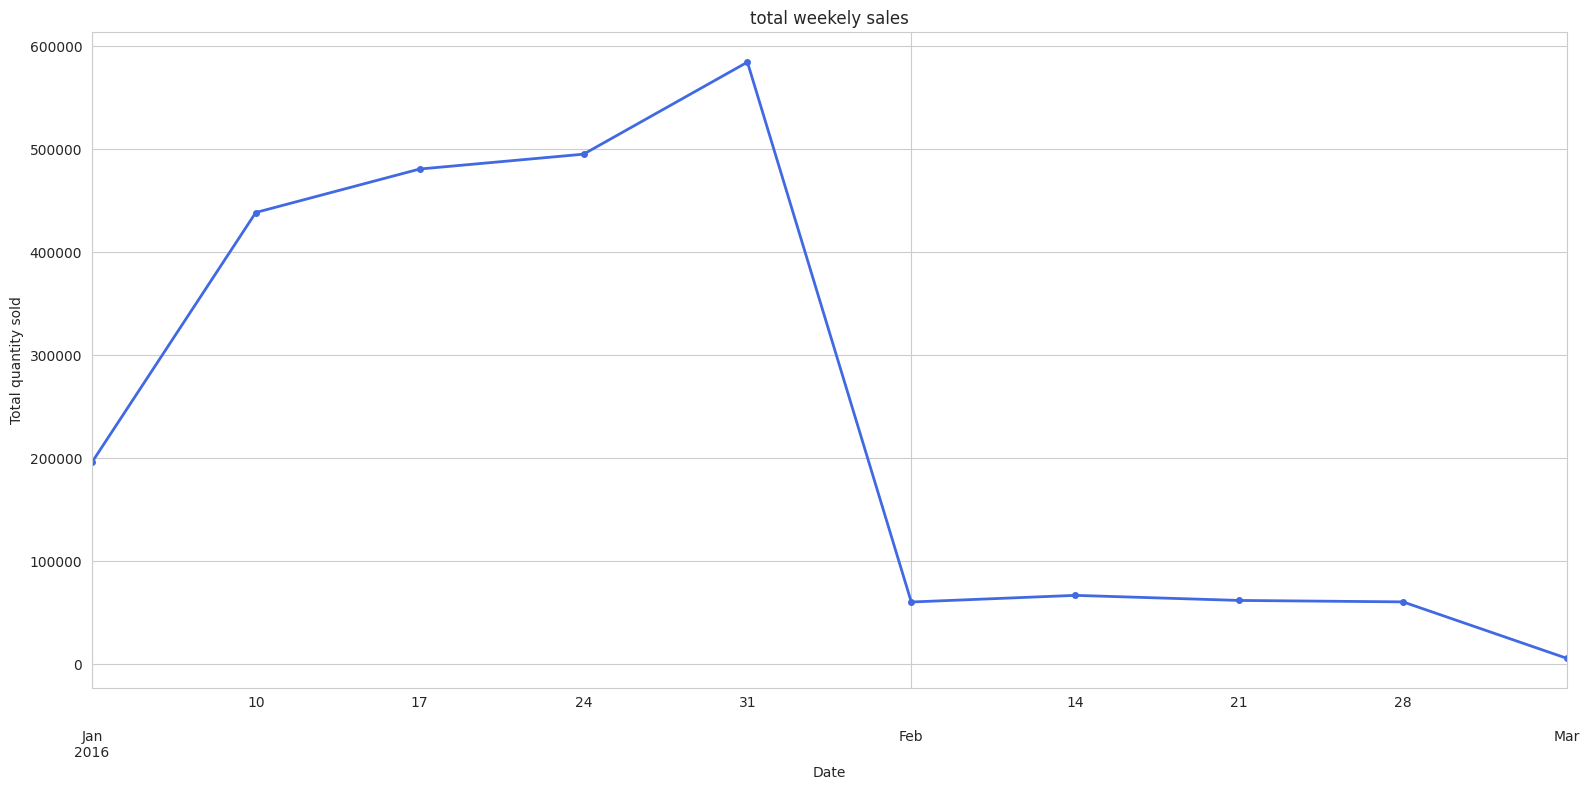

In [10]:
df_sales["SalesDate"] = pd.to_datetime(df_sales["SalesDate"], format ="%m/%d/%Y")
df_sales.set_index("SalesDate",inplace=True)
weekely_sales = df_sales["SalesQuantity"].resample("W").sum()

#visualization of the weekely sales data 
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
weekely_sales.plot(linewidth=2,color="royalblue",marker="o",markersize=4,linestyle="-")
plt.title("total weekely sales")
plt.xlabel("Date")
plt.ylabel("Total quantity sold")
plt.tight_layout()
plt.show()

In [11]:
import numpy as np 

ABC Analysis

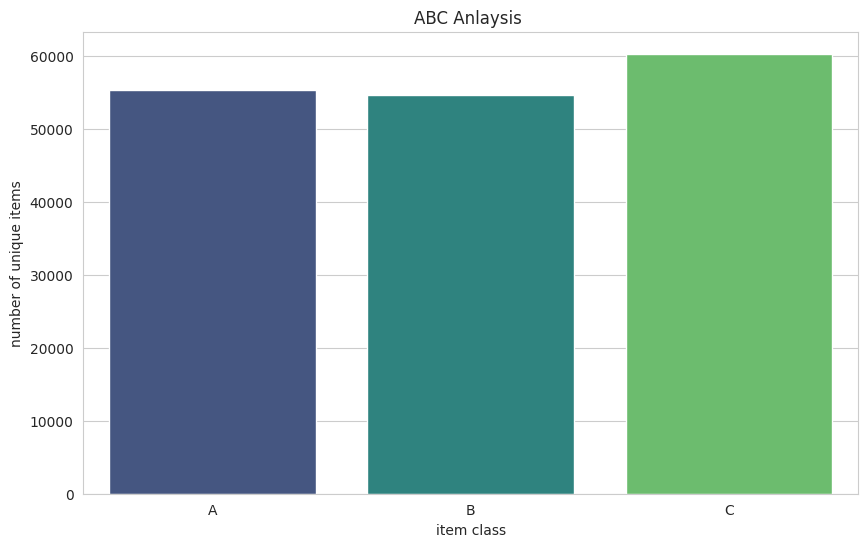

In [12]:
#df_sales.reset_index(inplace=True)
#finding the item value for classification into abc groups 
item_value = df_sales.groupby("InventoryId")["SalesDollars"].sum().reset_index()
item_value= item_value.sort_values(by="SalesDollars",ascending=False)

#finding cumulative 
total_revenue = item_value["SalesDollars"].sum()
item_value["CumulativeValue"]=item_value["SalesDollars"].cumsum()
# caluculating cumulative opercentage of total revenue 
item_value["CumulativePercentage"]=(item_value["CumulativeValue"]/total_revenue)*100

#classifying the values into a,b,c categories 
#category a = 85%
#category b = 15%
#category c = 5%
# function for classifying the categories

def classify_abc(row):
    if row["CumulativePercentage"]<=80:
        return "A"
    elif row["CumulativePercentage"]<=95:
        return "B"
    else :
        return "C"

item_value["ABC_Class"]=item_value.apply(classify_abc,axis=1)
item_value.head()

class_counts=item_value["ABC_Class"].value_counts()

#graph 

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values,order=["A","B","C"],palette="viridis")
plt.title("ABC Anlaysis ")
plt.xlabel("item class")
plt.ylabel("number of unique items")
plt.show()

In [13]:
#economic order quantity 
# what i understood through web is that this is used to find the ideal order quantity 
# so ideal order quantity depends on the total costs holdinng and ordering(assumed)
# economic order quantity is caluclated using formula so i am using the same here as well
# d= annual demand
#s= cost per order(not given)
#h = anaual holding cost for single unit(not given)
# so i am skipping it 

## Economic Order Quantity (EOQ), Reorder Point & Lead Time Analysis

In the next cells we will:
- Derive per-SKU demand statistics from `df_sales`
- Approximate unit costs from `df_pur_price`
- Compute EOQ per SKU using standard inventory formulas
- Estimate reorder points (including safety stock) using demand and lead time
- Explore supplier / lead time behavior where data permits

> Note: Some business parameters (ordering cost per PO, annual holding cost rate, target service level) are not provided in the raw data, so we expose them as tunable assumptions you can change and re-run.

In [ ]:
# --- EOQ per SKU -----------------------------------------------------------

# 1. Build daily demand per SKU from the sales table
sales_daily = (
    df_sales.reset_index()[["SalesDate", "InventoryId", "SalesQuantity"]]
    .groupby(["InventoryId", "SalesDate"])["SalesQuantity"]
    .sum()
    .reset_index()
)

# 2. Aggregate demand statistics per SKU
sku_demand_stats = (
    sales_daily
    .groupby("InventoryId")
    .agg(
        days_with_sales=("SalesDate", "nunique"),
        total_units=("SalesQuantity", "sum"),
        avg_daily_demand=("SalesQuantity", "mean"),
        demand_sd=("SalesQuantity", "std"),
    )
    .reset_index()
)

# Convert observed demand into an annualized estimate
sku_demand_stats["annual_demand_units"] = sku_demand_stats["avg_daily_demand"] * 365

# 3. Get an approximate unit cost per SKU from the purchase price table
#    We try to infer the most likely "price" column dynamically so the code
#    still runs even if the exact column name changes slightly.
price_cols = [c for c in df_pur_price.columns if "price" in c.lower() or "cost" in c.lower()]

if price_cols:
    unit_price_col = price_cols[0]
    sku_cost = (
        df_pur_price
        .groupby("InventoryId")[unit_price_col]
        .mean()
        .reset_index()
        .rename(columns={unit_price_col: "unit_cost"})
    )
else:
    # Fallback: no cost data available – we assume a nominal cost of 1 per unit
    sku_cost = pd.DataFrame({
        "InventoryId": sku_demand_stats["InventoryId"],
        "unit_cost": 1.0,
    })

sku_econ = sku_demand_stats.merge(sku_cost, on="InventoryId", how="left")

# Fill any missing unit_cost with the median of observed values
sku_econ["unit_cost"] = sku_econ["unit_cost"].fillna(sku_econ["unit_cost"].median())

# 4. Business assumptions for EOQ
ordering_cost_per_po = 50.0      # cost to place and process one purchase order (adjust as needed)
annual_holding_rate = 0.25       # 25% of item cost per year (capital + storage + risk)

sku_econ["holding_cost_per_unit"] = annual_holding_rate * sku_econ["unit_cost"]

# EOQ formula: Q* = sqrt( 2 * D * S / H )
# D = annual_demand_units, S = ordering_cost_per_po, H = holding_cost_per_unit
sku_econ["EOQ_units"] = np.sqrt(
    (2 * sku_econ["annual_demand_units"] * ordering_cost_per_po)
    / sku_econ["holding_cost_per_unit"].replace(0, np.nan)
)

# Link to ABC class where available
if "item_value" in globals():
    sku_econ = sku_econ.merge(
        item_value[["InventoryId", "ABC_Class"]],
        on="InventoryId",
        how="left",
    )

# Inspect the top SKUs by economic importance (high demand, non-null EOQ)
sku_econ_sorted = sku_econ.sort_values("annual_demand_units", ascending=False)
sku_econ_sorted.head(10)

In [ ]:
# --- Reorder Point (ROP) & Safety Stock per SKU ---------------------------

# We approximate lead time using the purchases table. The exact column names
# may differ, so we attempt to detect a generic "date" column for orders.

lead_time_days_default = 7   # fallback lead time if we cannot compute from data
service_level = 0.95         # target cycle service level (A-items often use 95%+)

from scipy.stats import norm
z = norm.ppf(service_level)

# Try to infer a purchase date column from df_pur_final
purchase_date_cols = [c for c in df_pur_final.columns if "date" in c.lower()]

if purchase_date_cols:
    purchase_date_col = purchase_date_cols[0]
    df_pur_final[purchase_date_col] = pd.to_datetime(df_pur_final[purchase_date_col])

    # Compute time between consecutive purchase orders as a proxy for lead time
    df_pur_final = df_pur_final.sort_values(["InventoryId", purchase_date_col])
    df_pur_final["days_between_pos"] = (
        df_pur_final
        .groupby("InventoryId")[purchase_date_col]
        .diff()
        .dt.days
    )

    lead_time_by_sku = (
        df_pur_final
        .groupby("InventoryId")["days_between_pos"]
        .median()
        .reset_index()
        .rename(columns={"days_between_pos": "lead_time_days"})
    )
else:
    # If we cannot infer any purchase date, we will fall back to a constant lead time
    lead_time_by_sku = pd.DataFrame({
        "InventoryId": sku_econ["InventoryId"],
        "lead_time_days": lead_time_days_default,
    })

sku_policy = sku_econ.merge(lead_time_by_sku, on="InventoryId", how="left")
sku_policy["lead_time_days"] = sku_policy["lead_time_days"].fillna(lead_time_days_default)

# ROP components
sku_policy["avg_demand_during_lt"] = (
    sku_policy["avg_daily_demand"] * sku_policy["lead_time_days"]
)

# Safety stock assuming Normal demand and independent daily demand
sku_policy["safety_stock"] = (
    z * sku_policy["demand_sd"].fillna(0) * np.sqrt(sku_policy["lead_time_days"])
)

sku_policy["reorder_point_units"] = (
    sku_policy["avg_demand_during_lt"] + sku_policy["safety_stock"]
)

# Show suggested policies for the most important A-class items
mask_a = sku_policy.get("ABC_Class").eq("A") if "ABC_Class" in sku_policy.columns else slice(None)

sku_policy.loc[mask_a, [
    "InventoryId",
    "ABC_Class" if "ABC_Class" in sku_policy.columns else "InventoryId",
    "annual_demand_units",
    "unit_cost",
    "EOQ_units",
    "lead_time_days",
    "reorder_point_units",
    "safety_stock",
]].sort_values("annual_demand_units", ascending=False).head(15)

## Lead Time & Supplier Performance (Exploratory)

The exact structure of `df_invoicepurchase` and `df_pur_final` will determine how far we can go, but a typical approach is:

- **Link purchase orders to receipts/invoices** using keys such as `InvoiceNumber`, `PONumber`, `VendorId`, and `InventoryId`.
- **Compute lead time** as the difference between order date and receipt/invoice date.
- **Summarize by supplier** (mean, median, and variability of lead time) to flag unreliable vendors.
- **Segment SKUs** by both ABC class and lead-time reliability (e.g., long + volatile lead time) to prioritize safety stock and alternate sourcing.

You can extend this notebook by:
- Inspecting `df_invoicepurchase.columns` and `df_pur_final.columns` to identify order and receipt date fields.
- Joining the tables on shared keys and recomputing the `lead_time_days` distribution by `VendorId`.
- Building supplier scorecards combining **on-time performance**, **fill rate**, and **cost competitiveness**.

## Executive Summary (Auto-generated)

This section produces a quick, interview-ready summary of:
- Demand & revenue concentration (ABC)
- EOQ and ROP recommendations (policy parameters)
- A short list of “what to do next” actions

Run the next cell after the EOQ/ROP cells.

In [ ]:
# --- Executive Summary KPIs ------------------------------------------------

summary = {}

# 1) Overall scale
summary["sales_rows"] = len(df_sales) if "df_sales" in globals() else None
summary["unique_skus_in_sales"] = df_sales["InventoryId"].nunique() if "df_sales" in globals() and "InventoryId" in df_sales.columns else None

# 2) Revenue and units
if "df_sales" in globals():
    if "SalesDollars" in df_sales.columns:
        summary["total_sales_dollars"] = float(df_sales["SalesDollars"].sum())
    if "SalesQuantity" in df_sales.columns:
        summary["total_units_sold"] = float(df_sales["SalesQuantity"].sum())

# 3) ABC breakdown (count + revenue share)
if "item_value" in globals() and "ABC_Class" in item_value.columns and "SalesDollars" in item_value.columns:
    abc_counts = item_value["ABC_Class"].value_counts().to_dict()
    abc_revenue = item_value.groupby("ABC_Class")["SalesDollars"].sum()
    abc_revenue_share = (abc_revenue / abc_revenue.sum()).to_dict() if abc_revenue.sum() else {}
else:
    abc_counts, abc_revenue_share = {}, {}

# 4) Policy KPIs (EOQ & ROP)
policy_kpis = {}
if "sku_policy" in globals():
    for col in ["EOQ_units", "reorder_point_units", "lead_time_days", "annual_demand_units", "unit_cost"]:
        if col in sku_policy.columns:
            policy_kpis[f"{col}_median"] = float(sku_policy[col].median())
            policy_kpis[f"{col}_p90"] = float(sku_policy[col].quantile(0.9))

# 5) Top SKUs by sales dollars
top_skus = None
if "df_sales" in globals() and "SalesDollars" in df_sales.columns and "InventoryId" in df_sales.columns:
    top_skus = (
        df_sales.reset_index(drop=False)
        .groupby("InventoryId")["SalesDollars"].sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
        .rename(columns={"SalesDollars": "sales_dollars"})
    )

# Display summary nicely
import pandas as pd

summary_rows = [
    {"metric": "Sales rows", "value": summary.get("sales_rows")},
    {"metric": "Unique SKUs in sales", "value": summary.get("unique_skus_in_sales")},
    {"metric": "Total sales dollars", "value": summary.get("total_sales_dollars")},
    {"metric": "Total units sold", "value": summary.get("total_units_sold")},
]

# ABC section
for cls in ["A", "B", "C"]:
    summary_rows.append({"metric": f"ABC {cls} count", "value": abc_counts.get(cls)})
    share = abc_revenue_share.get(cls)
    summary_rows.append({"metric": f"ABC {cls} revenue share", "value": (float(share) if share is not None else None)})

# Policy KPIs
for k, v in policy_kpis.items():
    summary_rows.append({"metric": k, "value": v})

summary_df = pd.DataFrame(summary_rows)
summary_df

In [ ]:
# Top 10 SKUs by Sales Dollars (if available)

top_skus

### Recommendations (What this enables)

- **Inventory optimization**:
  - **A items**: use higher service level (e.g., 95–99%), review weekly, enforce tighter reorder points, monitor stockouts.
  - **B items**: moderate service level (e.g., 90–95%), review bi-weekly/monthly.
  - **C items**: simplify ordering (larger review cycle or JIT where feasible), reduce attention spend.

- **Procurement / process improvements**:
  - Use `EOQ_units` to standardize order quantities and reduce frequent small POs.
  - Use `reorder_point_units` + `lead_time_days` to prevent stockouts and improve fill-rate.
  - For suppliers: compute true lead time (order→receipt) and rank vendors by **median lead time** and **variability**; prioritize negotiations/alternates for long & volatile lead-time vendors.

- **How to tune assumptions**:
  - Update `ordering_cost_per_po`, `annual_holding_rate`, and `service_level` in the EOQ/ROP cells and re-run to stress-test outcomes.

> Tip: In a real implementation, store the final outputs per SKU-location as policy tables and refresh monthly/weekly based on recent demand and lead-time variance.